# CHW03_Q2_99106352

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split
from scipy.interpolate import Rbf
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Load Data

In [2]:
# Load .mat file
mat_data = scipy.io.loadmat('DataNew.mat')

In [3]:
DataNew = mat_data['DataNew'].T
print(DataNew.shape)

(1000, 2)


## Plot Data

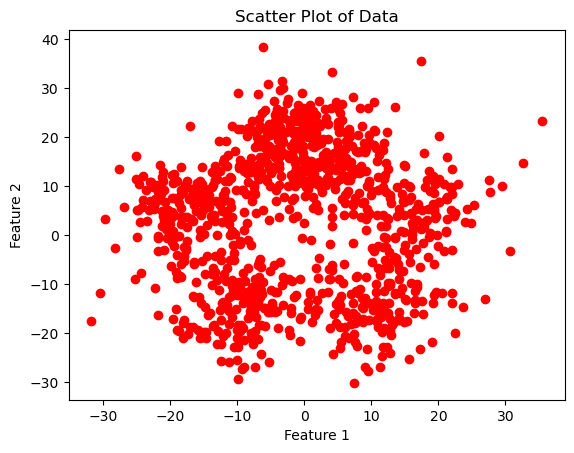

In [4]:
plt.scatter(DataNew[:,1],DataNew[:,0], color='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data')
plt.show()

## Self Written Kmeans Function

## A

In [5]:
def initialize_centers(data, num_clusters):
    # Random initialization
    indices = np.random.choice(len(data), num_clusters, replace=False)
    centers = data[indices]
    return centers

def assign_to_clusters(data, centers):
    # Assign each data point to the closest center
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centers(data, labels, num_clusters):
    # Update the cluster centers
    centers = np.array([np.mean(data[labels == i], axis=0) for i in range(num_clusters)])
    return centers

def k_means(data, num_clusters, max_iterations=100):
    # Initialize
    first_centers = initialize_centers(data, num_clusters)
    labels = np.zeros(len(data))
    centers = first_centers
    
    for _ in range(max_iterations):
        labels = assign_to_clusters(data, centers)

        # Update centers
        new_centers = update_centers(data, labels, num_clusters)

        # Check for convergence
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return labels, centers, first_centers

## B

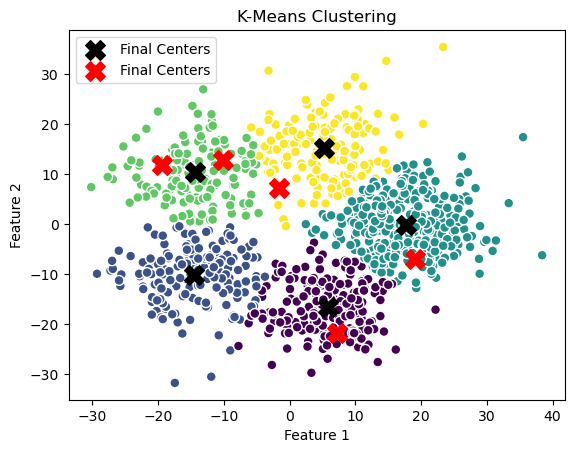

In [26]:
num_clusters = 5

cluster_labels, cluster_centers, initial_centers = k_means(DataNew, num_clusters)

# Display results
plt.scatter(DataNew[:, 0], DataNew[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='w', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=200, label='Final Centers')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', marker='X', s=200, label='Final Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### num_clusters = 4

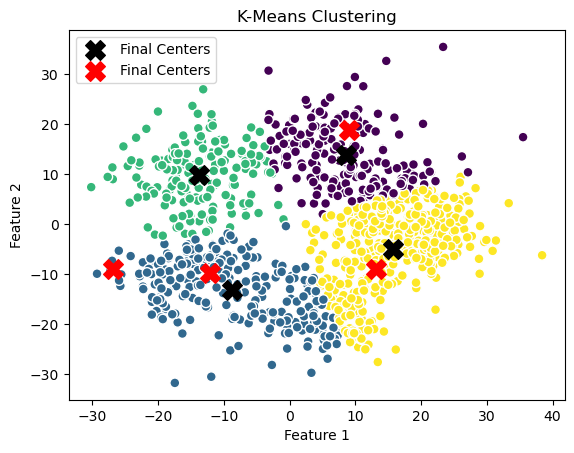

In [30]:
num_clusters = 4

cluster_labels, cluster_centers, initial_centers = k_means(DataNew, num_clusters)

# Display results
plt.scatter(DataNew[:, 0], DataNew[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='w', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=200, label='Final Centers')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', marker='X', s=200, label='Final Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### num_clusters = 6

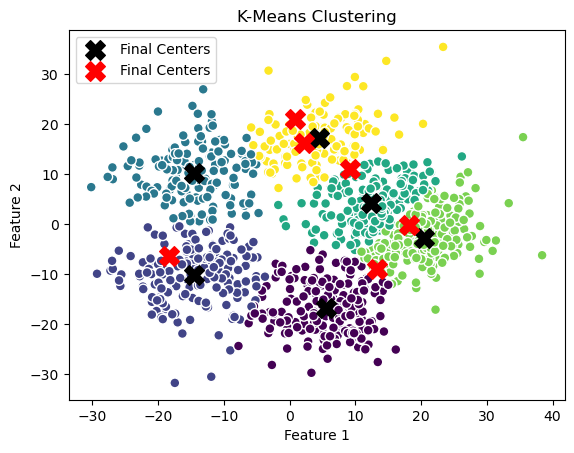

In [33]:
num_clusters = 6

cluster_labels, cluster_centers, initial_centers = k_means(DataNew, num_clusters)

# Display results
plt.scatter(DataNew[:, 0], DataNew[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='w', s=50)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=200, label='Final Centers')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', marker='X', s=200, label='Final Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Built-in Kmeans Function

In [39]:
def k_means_algorithm(data, num_clusters, initial_centers):
    kmeans = KMeans(n_clusters=num_clusters, init=initial_centers, n_init=1, random_state=42)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    return labels, centers

## D

### num_clusters = 5

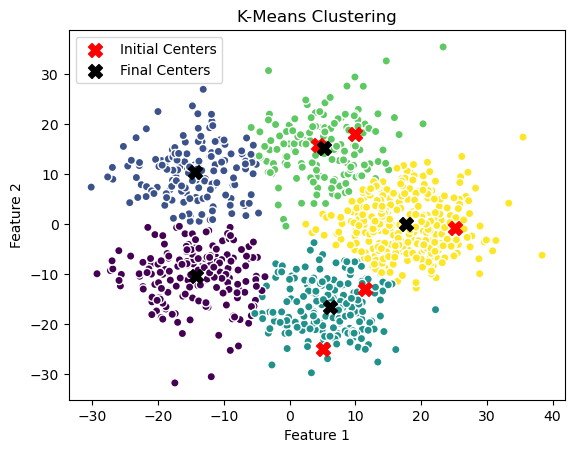

In [45]:
num_clusters = 5
indices = np.random.choice(len(DataNew), num_clusters, replace=False)
initial_centers = DataNew[indices]

cluster_labels, cluster_centers = k_means_algorithm(DataNew, num_clusters, initial_centers)

plt.scatter(DataNew[:, 0], DataNew[:, 1], c=cluster_labels, edgecolors='w')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='r', marker='X', s=100, label='Initial Centers')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, label='Final Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### num_clusters = 4

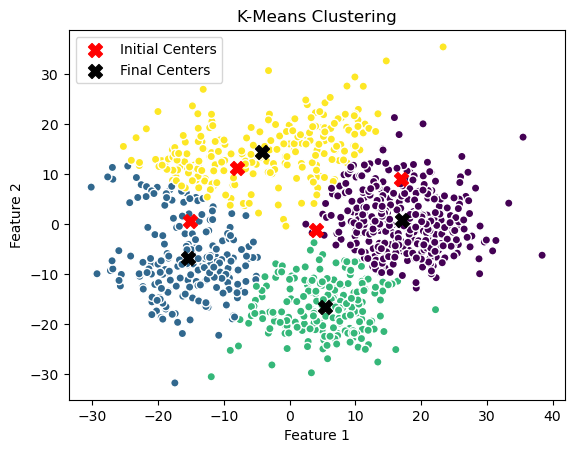

In [54]:
num_clusters = 4
indices = np.random.choice(len(DataNew), num_clusters, replace=False)
initial_centers = DataNew[indices]

cluster_labels, cluster_centers = k_means_algorithm(DataNew, num_clusters, initial_centers)

plt.scatter(DataNew[:, 0], DataNew[:, 1], c=cluster_labels, edgecolors='w')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='r', marker='X', s=100, label='Initial Centers')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, label='Final Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### num_clusters = 6

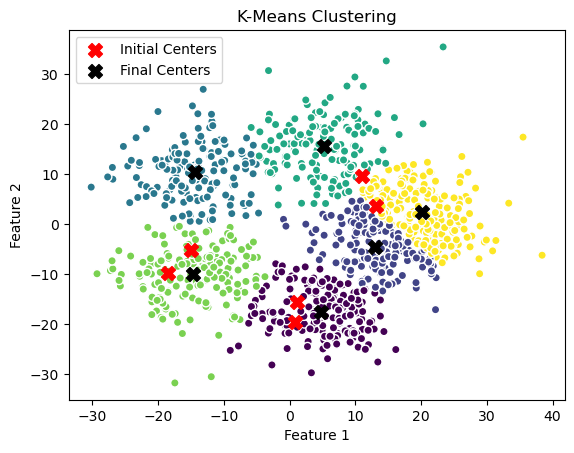

In [132]:
num_clusters = 6
indices = np.random.choice(len(DataNew), num_clusters, replace=False)
initial_centers = DataNew[indices]

cluster_labels, cluster_centers = k_means_algorithm(DataNew, num_clusters, initial_centers)

plt.scatter(DataNew[:, 0], DataNew[:, 1], c=cluster_labels, edgecolors='w')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='r', marker='X', s=100, label='Initial Centers')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='X', s=100, label='Final Centers')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## E

In [22]:
def get_cluster_representatives(data, labels):
    unique_labels = np.unique(labels)
    representatives = []
    for label in unique_labels:
        cluster_points = data[labels == label]
        cluster_representative = np.mean(cluster_points, axis=0)
        representatives.append(cluster_representative)
    return np.array(representatives)

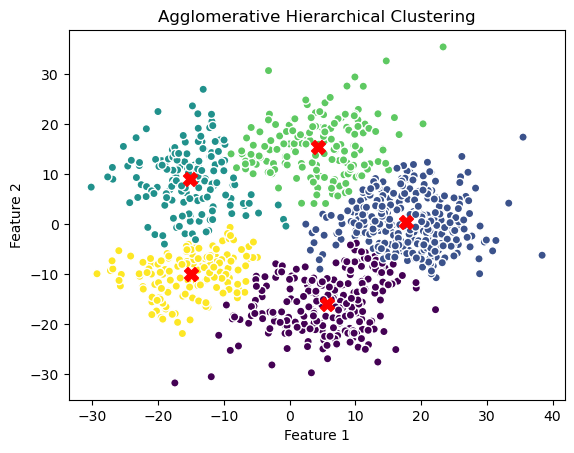

In [130]:
num_clusters = 5

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=num_clusters)
labels = model.fit_predict(DataNew)

# Get centroid
cluster_centroids = get_cluster_representatives(DataNew, labels)

# Plot
plt.scatter(DataNew[:, 0], DataNew[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='w')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', marker='X', s=100, label='Cluster Centroids')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

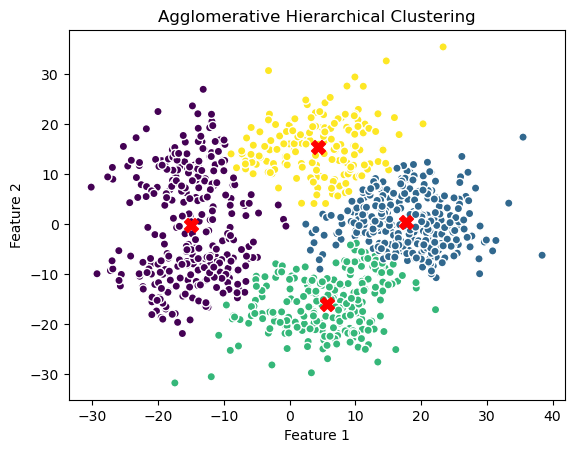

In [85]:
num_clusters = 4

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=num_clusters)
labels = model.fit_predict(DataNew)

# Get centroid
cluster_centroids = get_cluster_representatives(DataNew, labels)

# Plot
plt.scatter(DataNew[:, 0], DataNew[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='w')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', marker='X', s=100, label='Cluster Centroids')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

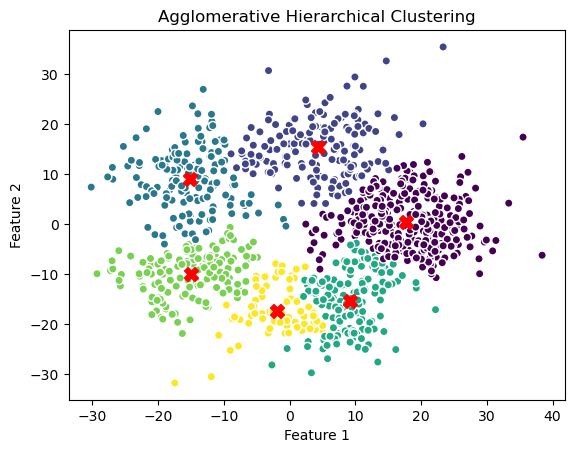

In [94]:
num_clusters = 6

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=num_clusters)
labels = model.fit_predict(DataNew)

# Get centroid
cluster_centroids = get_cluster_representatives(DataNew, labels)

# Plot
plt.scatter(DataNew[:, 0], DataNew[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='w')
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='red', marker='X', s=100, label='Cluster Centroids')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()